In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [67]:
df = pd.read_csv('../Data/Confirmed_Cases_US_Vaccinated_NewDataset.csv')
df

,Unnamed: 0,ObservationDate,Confirmed,People_Fully_Vaccinated
0,0,2020-01-22,1,0
1,1,2020-01-23,1,0
2,2,2020-01-24,2,0
3,3,2020-01-25,2,0
4,4,2020-01-26,5,0
...,...,...,...,...
462,462,2021-04-28,32230850,199426393
463,463,2021-04-29,32289049,202713598
464,464,2021-04-30,32346971,206220484
465,465,2021-05-01,32392274,210278776


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               467 non-null    int64 
 1   ObservationDate          467 non-null    object
 2   Confirmed                467 non-null    int64 
 3   People_Fully_Vaccinated  467 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.7+ KB


In [69]:
df.shape

(467, 4)

In [70]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0 ObservationDate  Confirmed  People_Fully_Vaccinated
0             0      2020-01-22          1                        0
1             1      2020-01-23          1                        0
2             2      2020-01-24          2                        0
3             3      2020-01-25          2                        0
4             4      2020-01-26          5                        0
..          ...             ...        ...                      ...
462         462      2021-04-28   32230850                199426393
463         463      2021-04-29   32289049                202713598
464         464      2021-04-30   32346971                206220484
465         465      2021-05-01   32392274                210278776
466         466      2021-05-02   32421534                213016060

[467 rows x 4 columns]>

In [71]:
df.columns

Index(['Unnamed: 0', 'ObservationDate', 'Confirmed',
       'People_Fully_Vaccinated'],
      dtype='object')

In [72]:
df = df.drop(columns=['Unnamed: 0'])
df           

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-01-22,1,0
1,2020-01-23,1,0
2,2020-01-24,2,0
3,2020-01-25,2,0
4,2020-01-26,5,0
...,...,...,...
462,2021-04-28,32230850,199426393
463,2021-04-29,32289049,202713598
464,2021-04-30,32346971,206220484
465,2021-05-01,32392274,210278776


In [73]:
df.shape

(467, 3)

In [74]:
## Use the data from April to May as test
start_index = df[df['ObservationDate']=='2021-04-01'].index
start_date = start_index[0]
start_date

435

In [77]:
x = np.arange(0, start_date).reshape(-1,1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [78]:
end_index = df[df['ObservationDate']=='2021-05-02'].index
end_date = end_index[0]
end_date

466

In [88]:
x_test = np.arange(start_date, end_date + 1)
x_test = x_test.reshape(-1,1)
x_test

array([[435],
       [436],
       [437],
       [438],
       [439],
       [440],
       [441],
       [442],
       [443],
       [444],
       [445],
       [446],
       [447],
       [448],
       [449],
       [450],
       [451],
       [452],
       [453],
       [454],
       [455],
       [456],
       [457],
       [458],
       [459],
       [460],
       [461],
       [462],
       [463],
       [464],
       [465],
       [466]])

In [81]:
y_v_test = df.iloc[start_date:,-1]
y_v_test

435    114583082
436    118422715
437    122216549
438    125385077
439    127355746
440    128602626
441    131454029
442    135064895
443    139105415
444    144145651
445    148071014
446    150979224
447    153501691
448    156266663
449    159943303
450    164207620
451    167974595
452    171603046
453    173830334
454    175551679
455    178322476
456    181665228
457    185563352
458    189409819
459    192837765
460    195081051
461    196802025
462    199426393
463    202713598
464    206220484
465    210278776
466    213016060
Name: People_Fully_Vaccinated, dtype: int64

In [82]:
y_v_train = df.iloc[:start_date,-1]
y_v_train

0              0
1              0
2              0
3              0
4              0
         ...    
430    102491174
431    105451667
432    107528783
433    109153459
434    111562791
Name: People_Fully_Vaccinated, Length: 435, dtype: int64

In [83]:
y_v_train.unique

<bound method Series.unique of 0              0
1              0
2              0
3              0
4              0
         ...    
430    102491174
431    105451667
432    107528783
433    109153459
434    111562791
Name: People_Fully_Vaccinated, Length: 435, dtype: int64>

# LogisticRegression Vaccinated

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

paramters = {'penalty': ['l1', 'l2'],
             'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
lr = LogisticRegression()
clf_v = GridSearchCV(lr, paramters, cv=5)
clf_v.fit(x, y_v_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/P

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estim

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']})

In [85]:
print(clf_v.best_estimator_)
print(clf_v.best_score_)

LogisticRegression(C=0.01)
0.8206896551724139


In [86]:
model_v = LogisticRegression(C=0.01)
model_v.fit(x, y_v_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [89]:
y_v_pred = model_v.predict(x_test)
y_v_pred

array([3221048, 3221048, 3221048, 3221048, 3221048, 3221048, 3221048,
       3221048, 3221048, 3221048, 3221048, 3221048, 3221048, 3221048,
       3221048, 3221048, 3221048, 3221048, 3221048, 3221048, 3221048,
       3221048, 3221048, 3221048, 3221048, 3221048, 3221048, 3221048,
       3221048, 3221048, 3221048, 3221048])

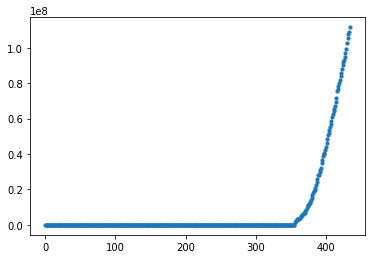

In [90]:
plt.scatter(x, y_v_train, s=10)

In [91]:
y_v_test = df.iloc[start_date:,-1]
y_v_test

435    114583082
436    118422715
437    122216549
438    125385077
439    127355746
440    128602626
441    131454029
442    135064895
443    139105415
444    144145651
445    148071014
446    150979224
447    153501691
448    156266663
449    159943303
450    164207620
451    167974595
452    171603046
453    173830334
454    175551679
455    178322476
456    181665228
457    185563352
458    189409819
459    192837765
460    195081051
461    196802025
462    199426393
463    202713598
464    206220484
465    210278776
466    213016060
Name: People_Fully_Vaccinated, dtype: int64

In [148]:
y_c_test = df.iloc[start_date:,-2]
y_c_test

435    30541255
436    30611086
437    30674153
438    30709125
439    30786804
440    30847348
441    30922386
442    31002264
443    31084962
444    31151497
445    31197877
446    31268107
447    31345985
448    31421360
449    31495649
450    31575640
451    31628013
452    31670031
453    31737964
454    31799237
455    31862094
456    31929351
457    31991750
458    32045113
459    32077178
460    32124869
461    32175725
462    32230850
463    32289049
464    32346971
465    32392274
466    32421534
Name: Confirmed, dtype: int64

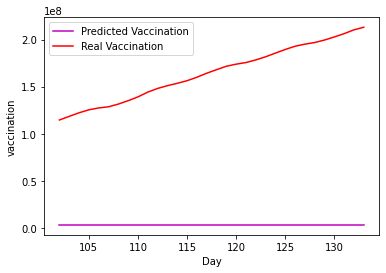

In [92]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred, y_v_test, color='r',label="Real Vaccination")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

## Confirmed	

In [93]:
y_c_train = df.iloc[:start_date,1]
vaccination = df.iloc[:start_date,-1]
vaccination

0              0
1              0
2              0
3              0
4              0
         ...    
430    102491174
431    105451667
432    107528783
433    109153459
434    111562791
Name: People_Fully_Vaccinated, Length: 435, dtype: int64

In [94]:
y_c_train

0             1
1             1
2             2
3             2
4             5
         ...   
430    30221396
431    30264493
432    30333922
433    30395171
434    30462210
Name: Confirmed, Length: 435, dtype: int64

In [125]:
vaccination_train_test = df.iloc[start_date:,-1]
vaccination_train_test

435    114583082
436    118422715
437    122216549
438    125385077
439    127355746
440    128602626
441    131454029
442    135064895
443    139105415
444    144145651
445    148071014
446    150979224
447    153501691
448    156266663
449    159943303
450    164207620
451    167974595
452    171603046
453    173830334
454    175551679
455    178322476
456    181665228
457    185563352
458    189409819
459    192837765
460    195081051
461    196802025
462    199426393
463    202713598
464    206220484
465    210278776
466    213016060
Name: People_Fully_Vaccinated, dtype: int64

In [130]:
x_c_train = np.vstack((np.array(df.iloc[:start_date,:].index.values.tolist()), vaccination)).T
x_c_train

array([[        0,         0],
       [        1,         0],
       [        2,         0],
       [        3,         0],
       [        4,         0],
       [        5,         0],
       [        6,         0],
       [        7,         0],
       [        8,         0],
       [        9,         0],
       [       10,         0],
       [       11,         0],
       [       12,         0],
       [       13,         0],
       [       14,         0],
       [       15,         0],
       [       16,         0],
       [       17,         0],
       [       18,         0],
       [       19,         0],
       [       20,         0],
       [       21,         0],
       [       22,         0],
       [       23,         0],
       [       24,         0],
       [       25,         0],
       [       26,         0],
       [       27,         0],
       [       28,         0],
       [       29,         0],
       [       30,         0],
       [       31,         0],
       [

In [149]:
x_c_test = np.vstack((np.array(df.iloc[start_date:end_date + 1,:].index.values.tolist()), df.iloc[start_date:end_date + 1,-1])).T
x_c_test

array([[      435, 114583082],
       [      436, 118422715],
       [      437, 122216549],
       [      438, 125385077],
       [      439, 127355746],
       [      440, 128602626],
       [      441, 131454029],
       [      442, 135064895],
       [      443, 139105415],
       [      444, 144145651],
       [      445, 148071014],
       [      446, 150979224],
       [      447, 153501691],
       [      448, 156266663],
       [      449, 159943303],
       [      450, 164207620],
       [      451, 167974595],
       [      452, 171603046],
       [      453, 173830334],
       [      454, 175551679],
       [      455, 178322476],
       [      456, 181665228],
       [      457, 185563352],
       [      458, 189409819],
       [      459, 192837765],
       [      460, 195081051],
       [      461, 196802025],
       [      462, 199426393],
       [      463, 202713598],
       [      464, 206220484],
       [      465, 210278776],
       [      466, 213016060]])

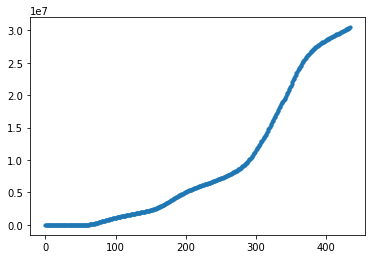

In [134]:
plt.scatter(x,y_c_train,s=10)

In [135]:
y_v_train

0              0
1              0
2              0
3              0
4              0
         ...    
430    102491174
431    105451667
432    107528783
433    109153459
434    111562791
Name: People_Fully_Vaccinated, Length: 435, dtype: int64

In [136]:
len(y_c_train.unique())

411

In [137]:
y_c_train

0             1
1             1
2             2
3             2
4             5
         ...   
430    30221396
431    30264493
432    30333922
433    30395171
434    30462210
Name: Confirmed, Length: 435, dtype: int64

In [138]:
y_c_train

0             1
1             1
2             2
3             2
4             5
         ...   
430    30221396
431    30264493
432    30333922
433    30395171
434    30462210
Name: Confirmed, Length: 435, dtype: int64

In [139]:
paramters = {'penalty': ['l1', 'l2'],
             'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
lr_c = LogisticRegression()
clf_c = GridSearchCV(lr_c, paramters,cv=5)

In [140]:
clf_c.fit(x_c_train, y_c_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/P

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estim

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']})

In [117]:
print(clf_c.best_estimator_)
print(clf_c.best_score_)

LogisticRegression(C=0.0001)
0.0


In [142]:
model_c = LogisticRegression(C=0.0001)
model_c.fit(x_c_train, y_c_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001)

In [150]:
y_c_pred = model_c.predict(x_c_test)
y_c_pred

array([30333922, 30333922, 30333922, 30333922, 30333922, 30333922,
       30333922, 30333922, 30333922, 30333922, 30333922, 30333922,
       30333922, 30333922, 30333922, 30333922, 30333922, 30333922,
       30333922, 30333922, 30333922, 30333922, 30333922, 30333922,
       30333922, 30333922, 30333922, 30333922, 30333922, 30333922,
       30333922, 30333922])

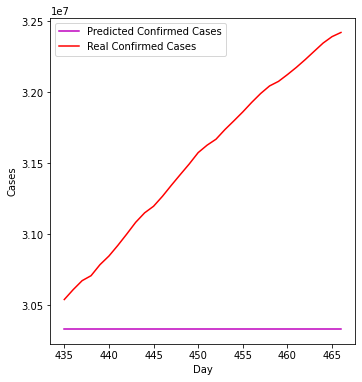

In [156]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_test, y_c_pred, color='m', label="Predicted Confirmed Cases")
plt.plot(x_test, y_c_test, color='r',label="Real Confirmed Cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")
plt.show()